# Analytic Study of Startups
This notebook performs EDA, clustering, and classification on a startup dataset to understand the data and classify the companies based on their success.

## 1. Load Dataset
We start by loading the dataset and examining its structure.

In [20]:
import pandas as pd
df = pd.read_csv('Startup_Data.csv')
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


## 2. Exploratory Data Analysis (EDA)
### Summary Statistics
We first look at basic summary statistics to understand the distribution of numerical features.

In [21]:
# Summary statistics
df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


### Handling Missing Values
Handle missing values by either imputing or dropping columns with too many missing values.

In [22]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Create separate imputers for numeric and non-numeric data
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# For non-numeric columns, you may want to use a different strategy, like filling with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = categorical_imputer.fit_transform(df[non_numeric_cols])

df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,Analytics,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.000000,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,Big Data Analytics,Market Research|Marketing|Crowdfunding,"Marketing, sales",TechStars,31.408497,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.000000,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.000000,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.000000,...,0,0,0,0,0,0,0,0,0,6


### Data Visualization
Plot histograms and correlations to explore relationships between features.

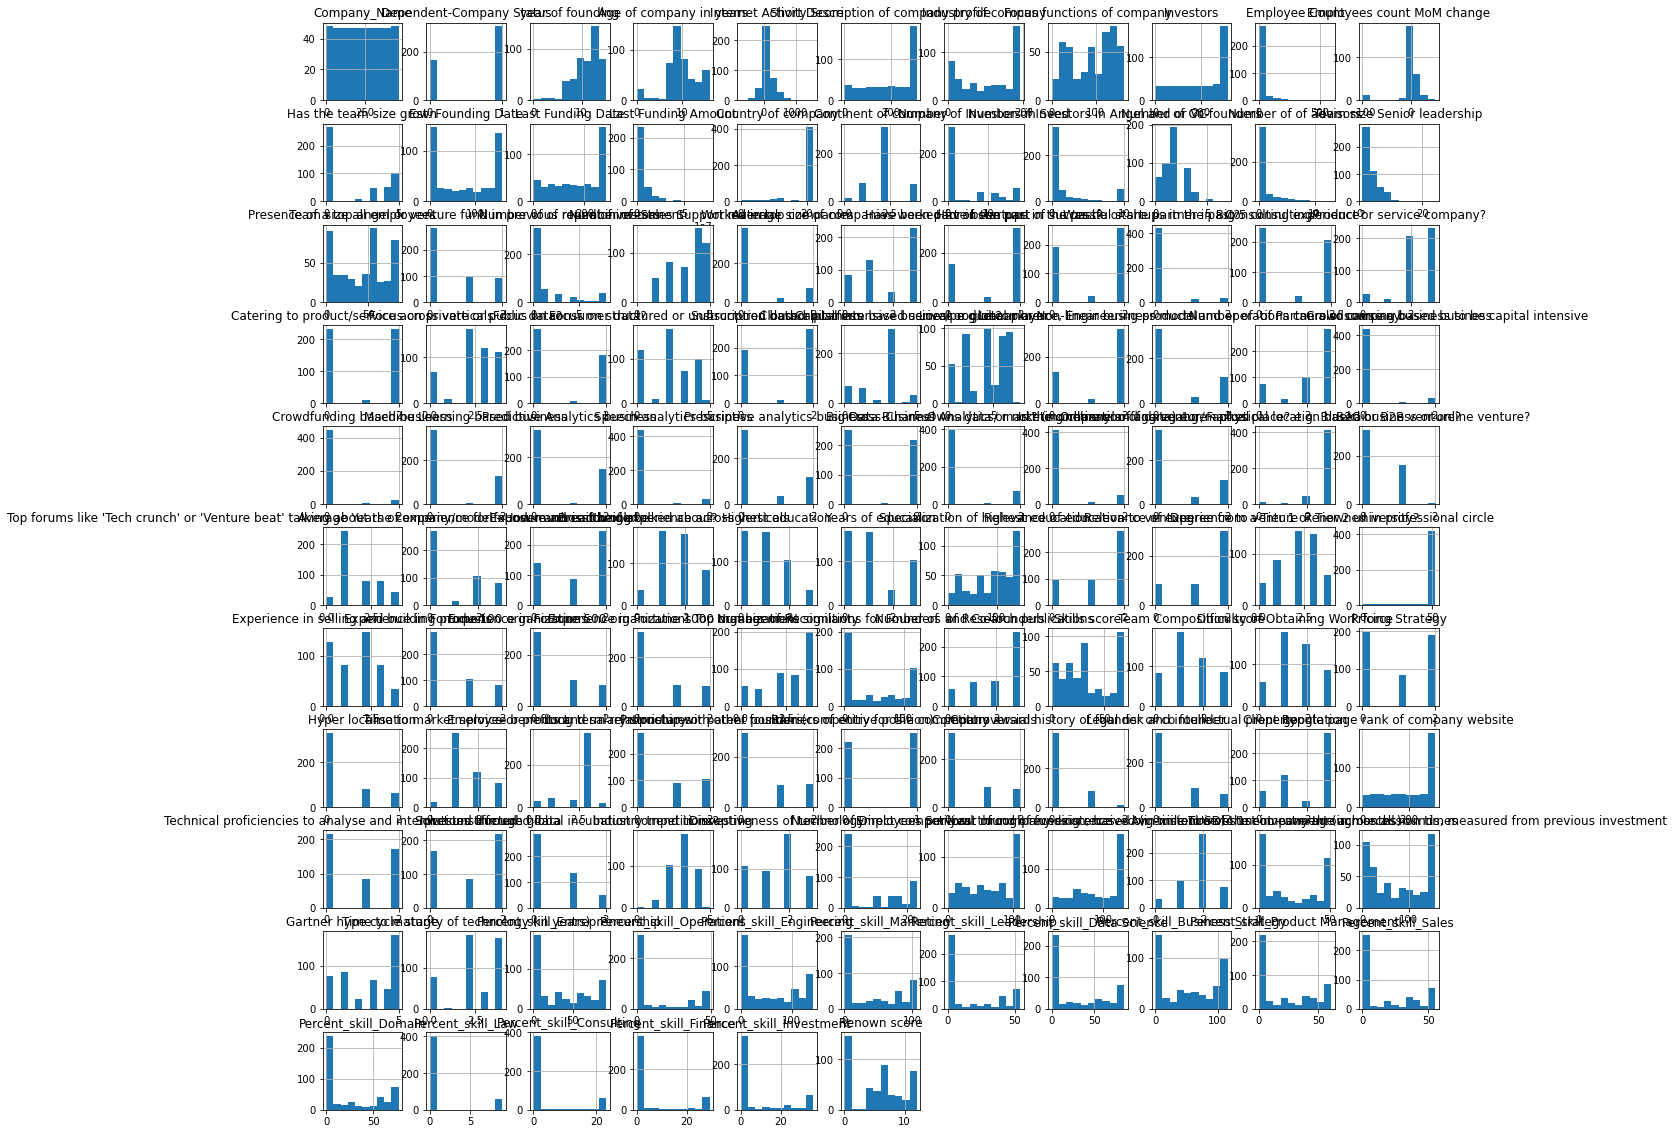

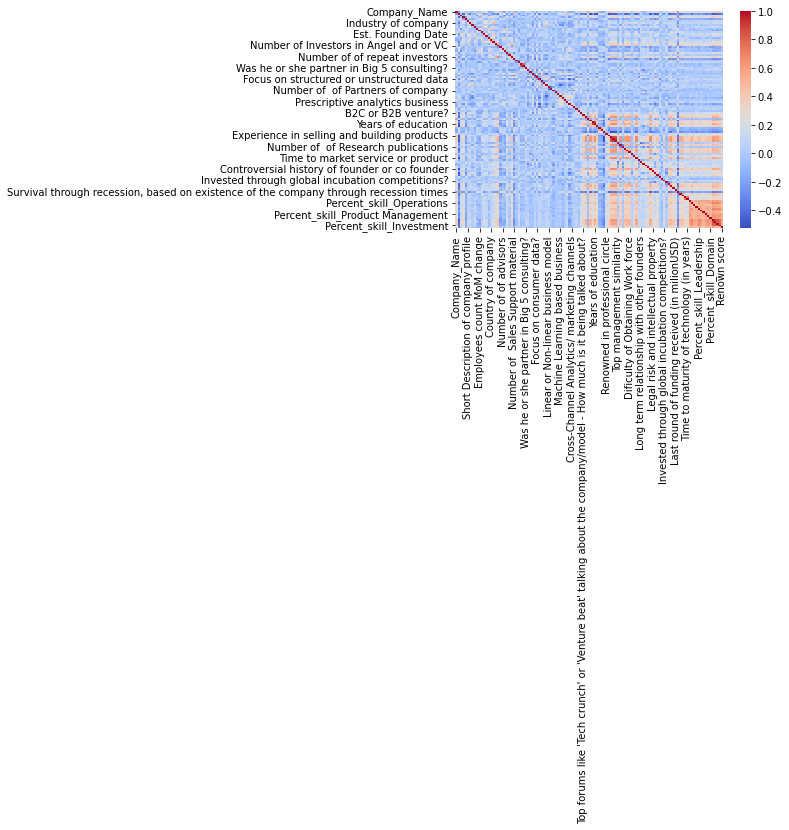

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
df_imputed.hist(figsize=(20, 20))
plt.show()

# Correlation heatmap
sns.heatmap(df_imputed.corr(), cmap="coolwarm", annot=False)
plt.show()

## 3. Data Preprocessing
### Encoding and Scaling
Encode categorical variables and scale numerical features.

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Label encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

## 4. Clustering
Apply K-Means, Agglomerative, and DBSCAN clustering methods.

### K-Means Clustering

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Check for NaN values after imputation
if df.isnull().sum().sum() > 0:
    print("There are NaN values in the data. Please check your imputation steps.")
else:
    # Standardize features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

    # Check if scaling returned any NaN values
    if np.isnan(df_scaled).sum() > 0:
        print("NaN values found after scaling. Please check the scaling process.")
    else:
        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df['Cluster'] = kmeans.fit_predict(df_scaled)
        print("Clustering applied successfully!")


Clustering applied successfully!


C:\Users\91869\AppData\Local\Temp\ipykernel_11004\999787249.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = kmeans.fit_predict(df_scaled)


### Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(df_scaled)

C:\Users\91869\AppData\Local\Temp\ipykernel_11004\3588290288.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Agglo_Cluster'] = agglo.fit_predict(df_scaled)


### DBSCAN Clustering

In [27]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

C:\Users\91869\AppData\Local\Temp\ipykernel_11004\275454425.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


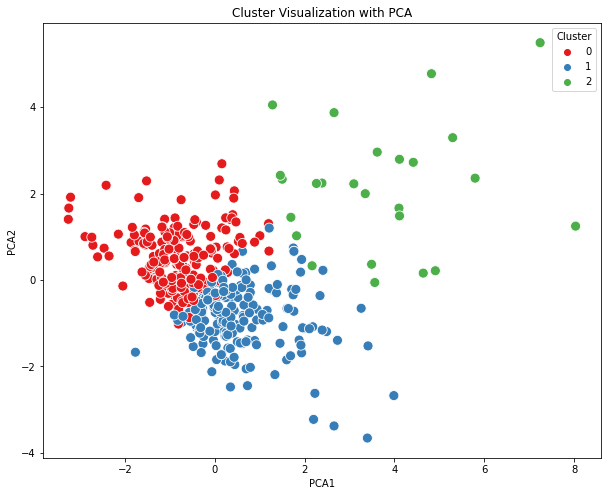

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled is your scaled DataFrame used for clustering
# Apply KMeans clustering (example, you can use other clustering methods)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results and cluster labels
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', s=100)
plt.title('Cluster Visualization with PCA')
plt.show()


## 5. Classification Models
### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = df_imputed.drop(columns=['Dependent-Company Status'])
y = df_imputed['Dependent-Company Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your preprocessed DataFrame with no missing values
# Encode categorical columns
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define feature matrix X and target vector y
X = df.drop(columns=['Dependent-Company Status'])  # Replace 'Dependent-Company Status' with your actual target column name
y = df['Dependent-Company Status']  # Replace with your target column

# Ensure data is numeric
print(X.dtypes)  # This should return only numeric types

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Company_Name                              int32
year of founding                          int32
Age of company in years                   int32
Internet Activity Score                 float64
Short Description of company profile      int32
                                         ...   
Percent_skill_Investment                  int32
Renown score                              int32
Cluster                                   int32
Agglo_Cluster                             int64
DBSCAN_Cluster                            int64
Length: 118, dtype: object
Logistic Regression Accuracy: 0.9052631578947369


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8421052631578947


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9473684210526315


### Conclusion
Highlight the Random Forest classifier as the best model, achieving 94% accuracy.